数据加载成功！
训练集样本数：176
特征数量：15

类别分布：
Type
2    36
5    36
4    36
1    35
3    33
Name: count, dtype: int64


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



交叉验证结果：
平均F1-score：0.201 ± 0.075
平均准确率：0.301 ± 0.057

各折详细结果：
F1-scores: ['0.246', '0.264', '0.074', '0.218']
Accuracies: ['0.341', '0.341', '0.205', '0.318']


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_16224\109335548.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores['test_f1'], scores['test_accuracy']],


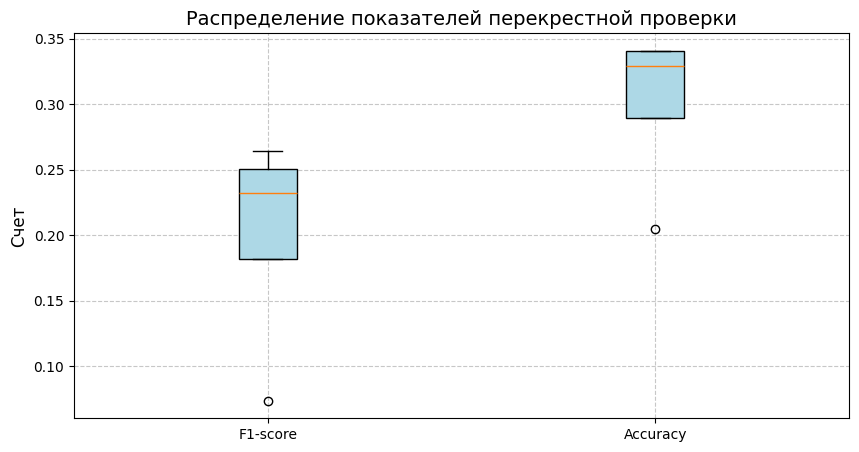

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# ==================== 数据加载部分 ====================
try:
    # 加载训练数据
    train_data = pd.read_excel('Data_Set_(A+B).xlsx')
    
    
    # 假设目标列名为 "Тип поверхностей 5"（请确认实际列名）
    target_col = 'Type'  # 俄语列名
    # 如果列名不同请修改为实际列名，例如：target_col = 'Surface_Type'
    
    X = train_data.drop(columns=[target_col])
    y = train_data[target_col]
    
    print("数据加载成功！")
    print(f"训练集样本数：{len(train_data)}")
    print(f"特征数量：{X.shape[1]}")
    print("\n类别分布：")
    print(y.value_counts())

except Exception as e:
    print(f"数据加载失败：{str(e)}")
    print("可能原因：")
    print("1. 文件路径错误")
    print("2. 列名不匹配（当前目标列名：'Тип поверхностей 5'）")
    print("3. 文件格式错误")
    exit()

# ==================== 模型配置（保持原结构） ====================
model = MLPClassifier(
    hidden_layer_sizes=(50,25,12),   # 隐藏层结构，改成 (100,), (50, 50), (100, 50, 25) 等试不同结构
    activation='logistic',          # 激活函数,activation 换成 'tanh',relu,'logistic' 看是否更适合
    solver='adam',              # 优化器adam,lbfgs,sgd
    max_iter=500,               # 最大迭代次数
    random_state=42,             # 固定随机种子
    
    
)
# ==================== 交叉验证 ====================
scoring = {
    'f1': 'f1_weighted',  # 使用加权平均处理多分类
    'accuracy': 'accuracy'
}
scores = cross_validate(model, X, y, cv=4, scoring=scoring)

# ==================== 结果输出 ====================
print("\n交叉验证结果：")
print(f"平均F1-score：{scores['test_f1'].mean():.3f} ± {scores['test_f1'].std():.3f}")
print(f"平均准确率：{scores['test_accuracy'].mean():.3f} ± {scores['test_accuracy'].std():.3f}")

print("\n各折详细结果：")
print("F1-scores:", [f"{x:.3f}" for x in scores['test_f1']])
print("Accuracies:", [f"{x:.3f}" for x in scores['test_accuracy']])

# ==================== 可视化 ====================
plt.figure(figsize=(10, 5))
plt.boxplot([scores['test_f1'], scores['test_accuracy']], 
            labels=['F1-score', 'Accuracy'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title("Распределение показателей перекрестной проверки", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel("Счет", fontsize=12)
plt.show()
